In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

trn_df = pd.read_csv('tit_train.csv')

In [ ]:
trn_df.shape

(891, 12)

In [ ]:
trn_df.size

10692

In [ ]:
trn_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
trn_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
missing_values = trn_df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

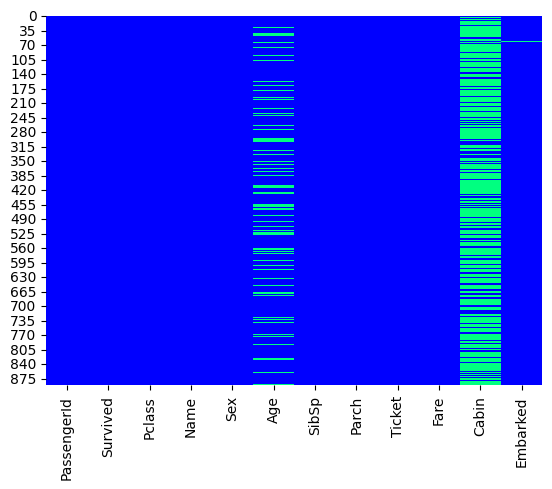

In [ ]:
sns.heatmap(trn_df.isnull(), cmap='winter', cbar=False)
plt.show()

In [ ]:
numerical_columns = trn_df.select_dtypes(include=['int64', 'float64']).columns
trn_df[numerical_columns] = trn_df[numerical_columns].fillna(trn_df[numerical_columns].mean())

In [ ]:
categorical_columns = trn_df.select_dtypes(include='object').columns
trn_df[categorical_columns] = trn_df[categorical_columns].fillna('Unknown')

In [ ]:
print(trn_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
numerical_columns = ['Age', 'Fare']

In [ ]:
Q1 = trn_df[numerical_columns].quantile(0.25)
Q3 = trn_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

In [ ]:


outliers = ((trn_df[numerical_columns] < (Q1 - threshold * IQR)) | (trn_df[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)


In [ ]:
trn_df = trn_df[~outliers]

In [ ]:
trn_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

trn_df1 = trn_df.drop(columns=columns_to_drop)

In [ ]:
trn_df1

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
5,0,3,male,29.699118,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,29.699118,1,2
889,1,1,male,26.000000,0,0


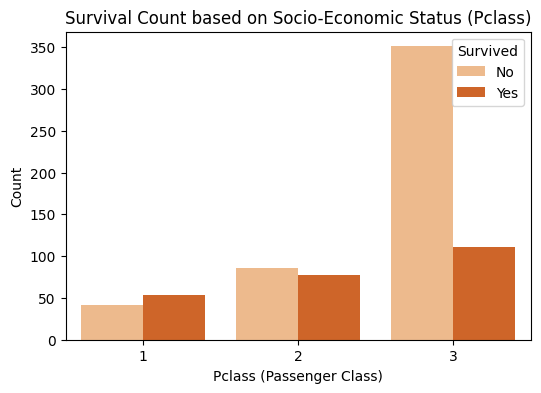

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=trn_df, palette='Oranges')
plt.title('Survival Count based on Socio-Economic Status (Pclass)')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

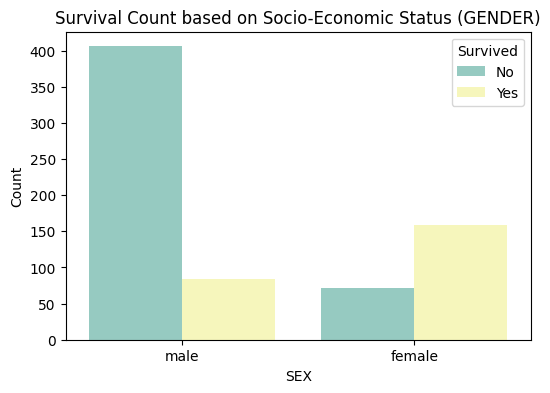

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=trn_df, palette='Set3')
plt.title('Survival Count based on Socio-Economic Status (GENDER)')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

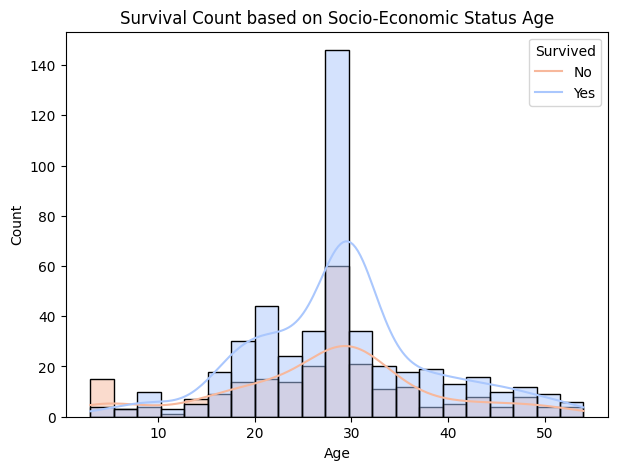

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(x='Age', hue='Survived', data=trn_df, kde=True, palette='coolwarm')
plt.title('Survival Count based on Socio-Economic Status Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

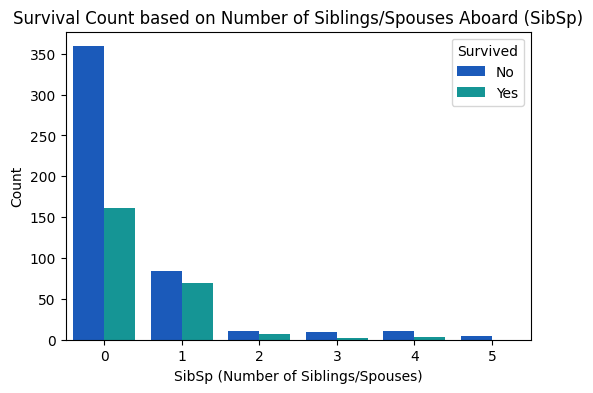

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=trn_df, palette='winter')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

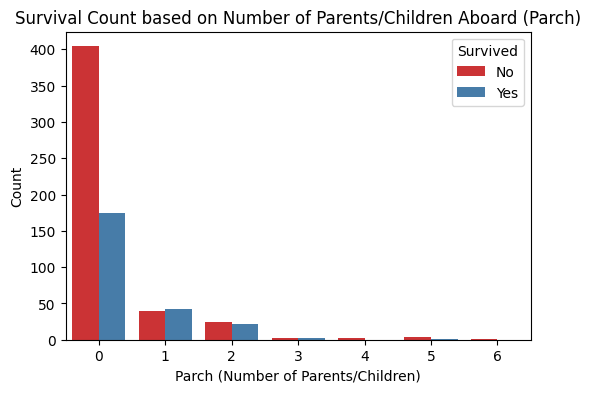

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=trn_df, palette='Set1')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()